<a href="https://colab.research.google.com/github/GloriaVazquezVidal/Mushrooms-Classifiers/blob/main/Mushrooms_DecisionTreeClassifier_and_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

To start with we will import the basic libraries and import our dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


df.info() gives us the summary of the data set with the name of the column and its dtype. We notice that all the columns of our data are categorical

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# Data Cleaning

We check that there are no duplicate or missing values in our data

In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

We will now conver all Object type columns into Numbers using LabelEncoder since our model really doesn't understand what a category is

In [6]:
label_encoder = LabelEncoder()
for feature in df.columns:
    df[feature] = label_encoder.fit_transform(df[feature])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


We are going to iterate over all the columns and observe the frequency of occurrence of the values. We will separate the independent features in X of our dataset

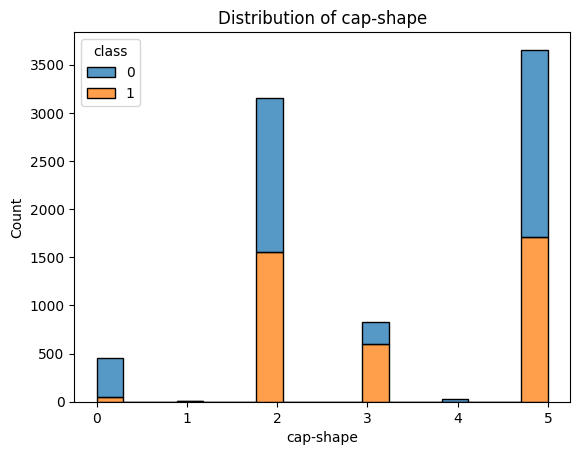

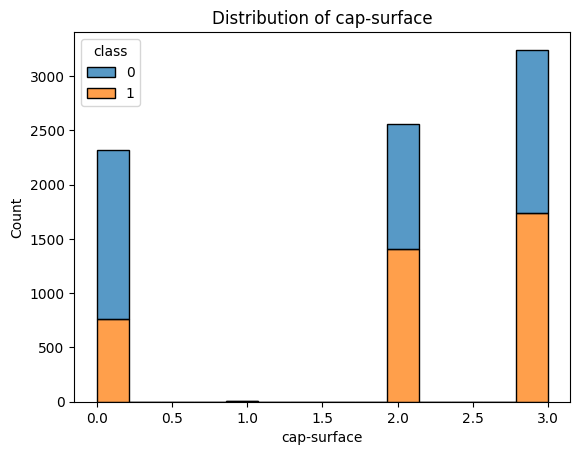

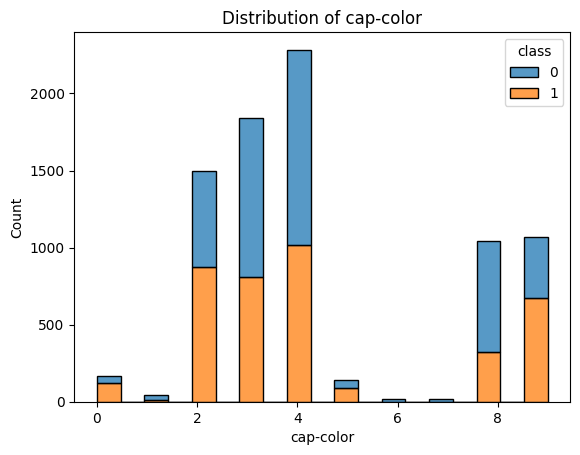

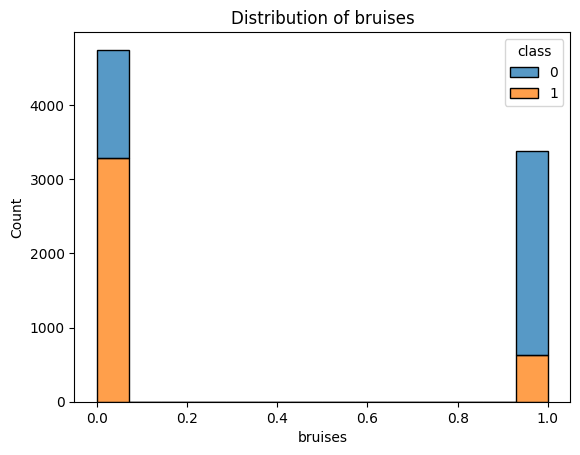

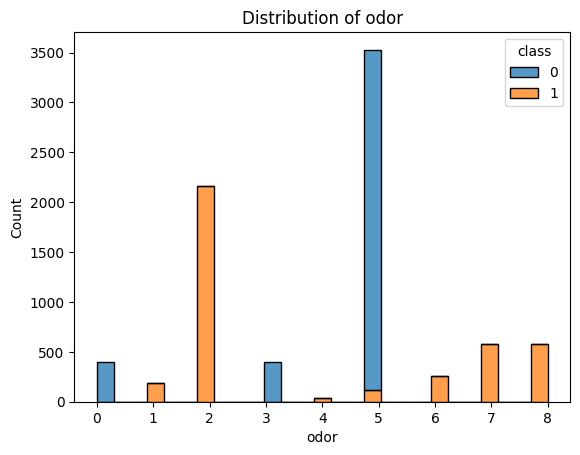

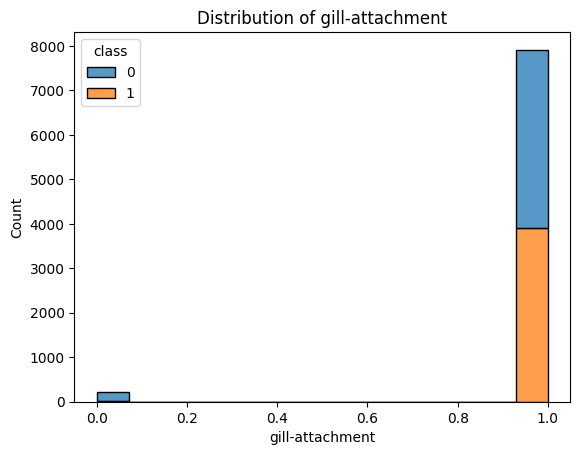

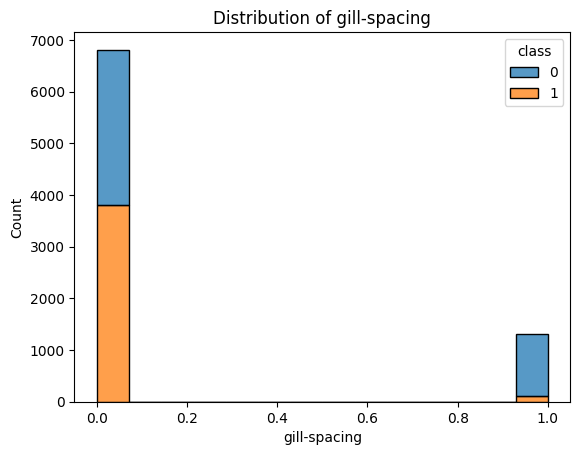

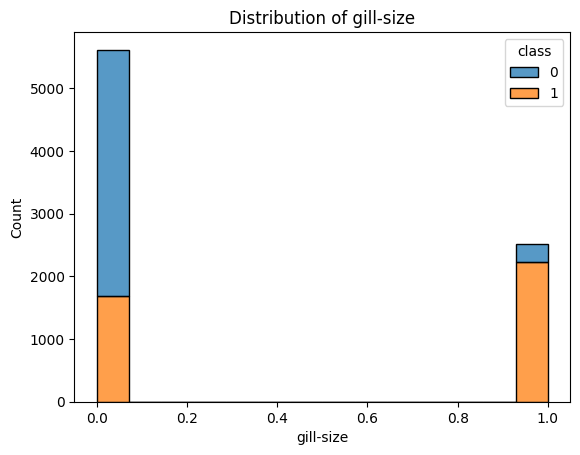

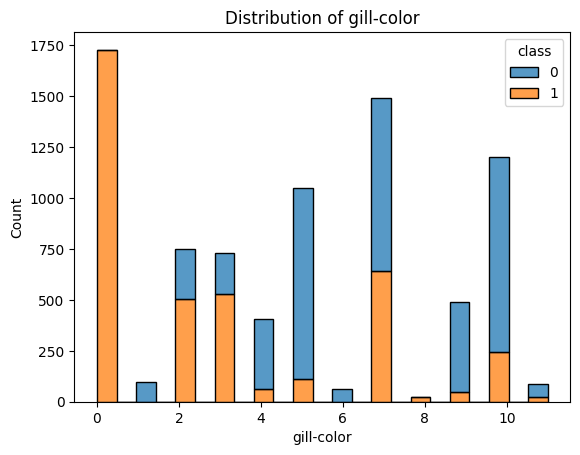

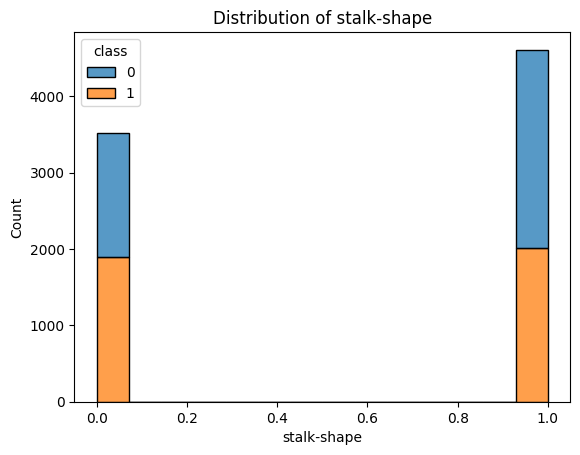

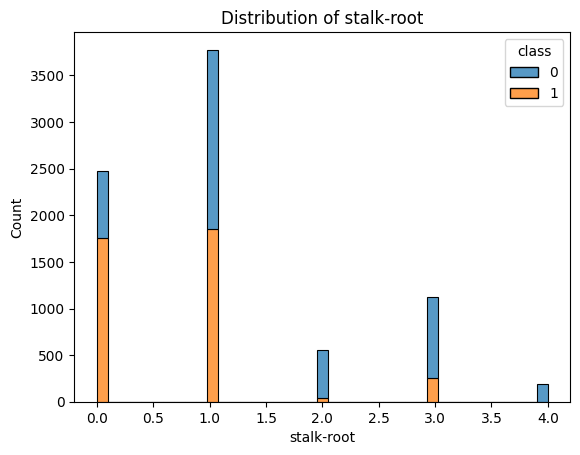

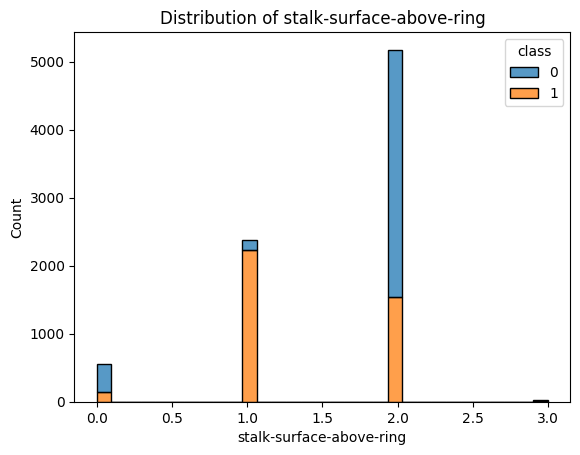

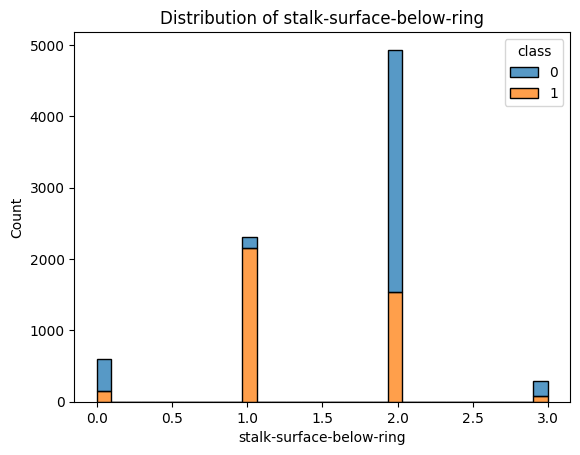

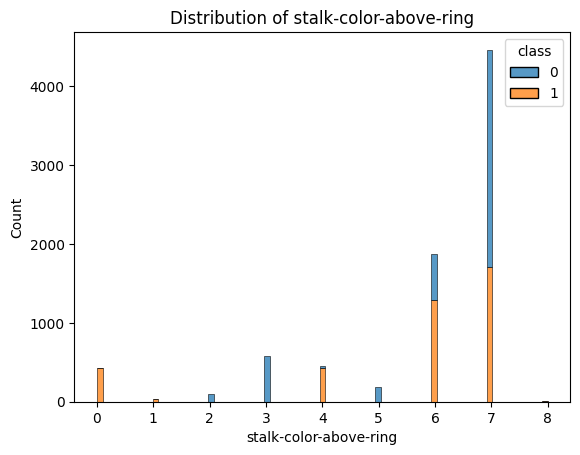

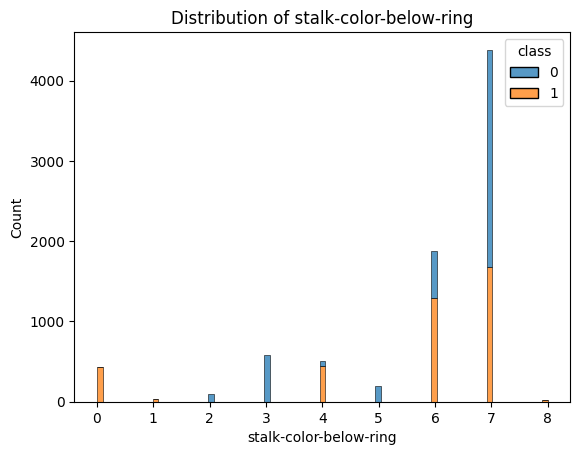

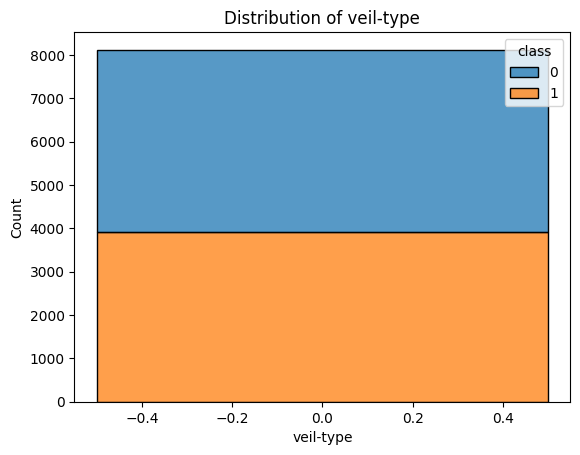

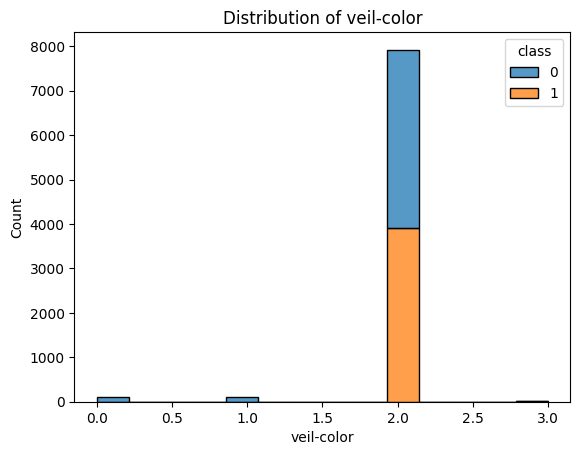

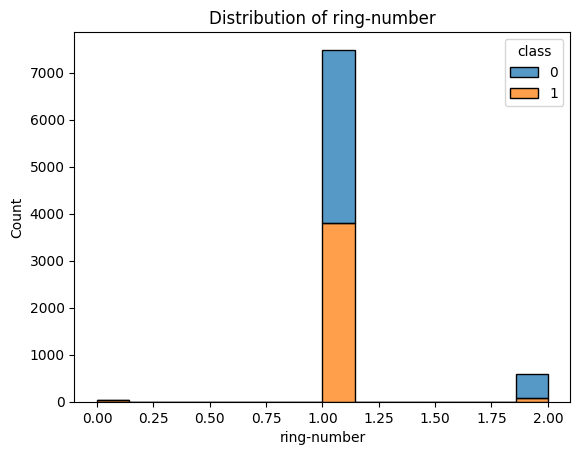

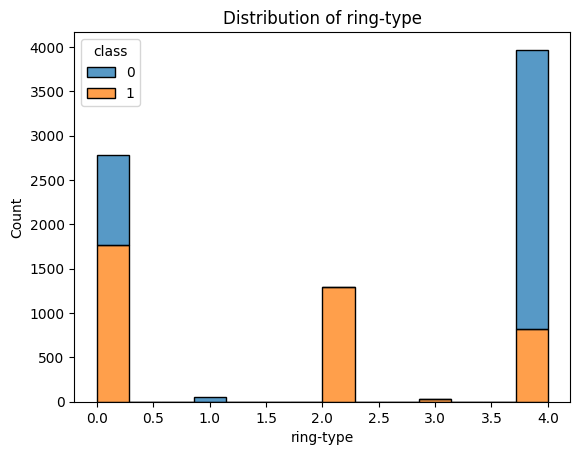

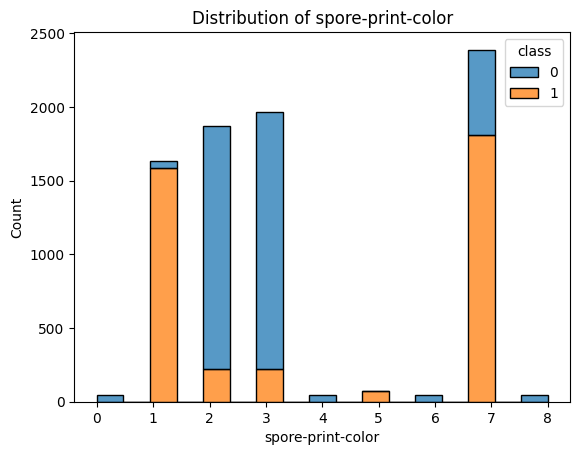

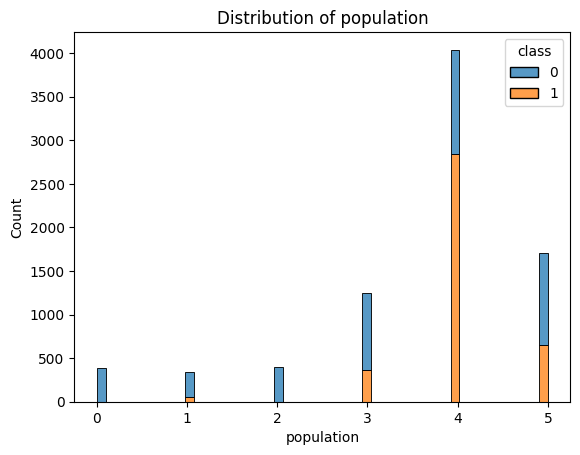

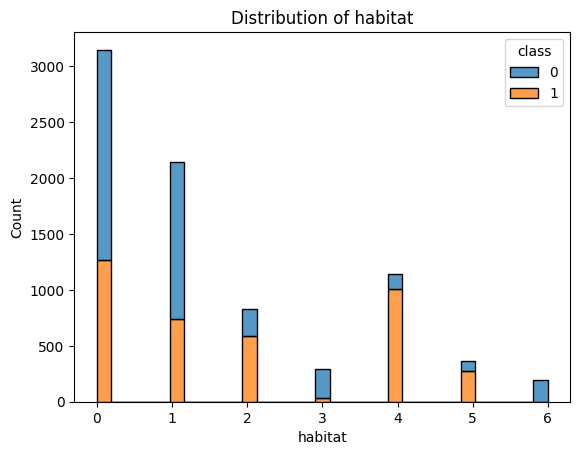

In [7]:
X = df.drop(["class"], axis = "columns")

for feature in X.columns:
    plt.figure()
    sns.histplot(data = df, x = feature, hue = 'class', multiple = 'stack')
    plt.title(f'Distribution of {feature}')
    plt.show()

# Feature Engineering

We show a heat map for each feature. As we can see, there is no correlation with "veil-type", so we remove this column

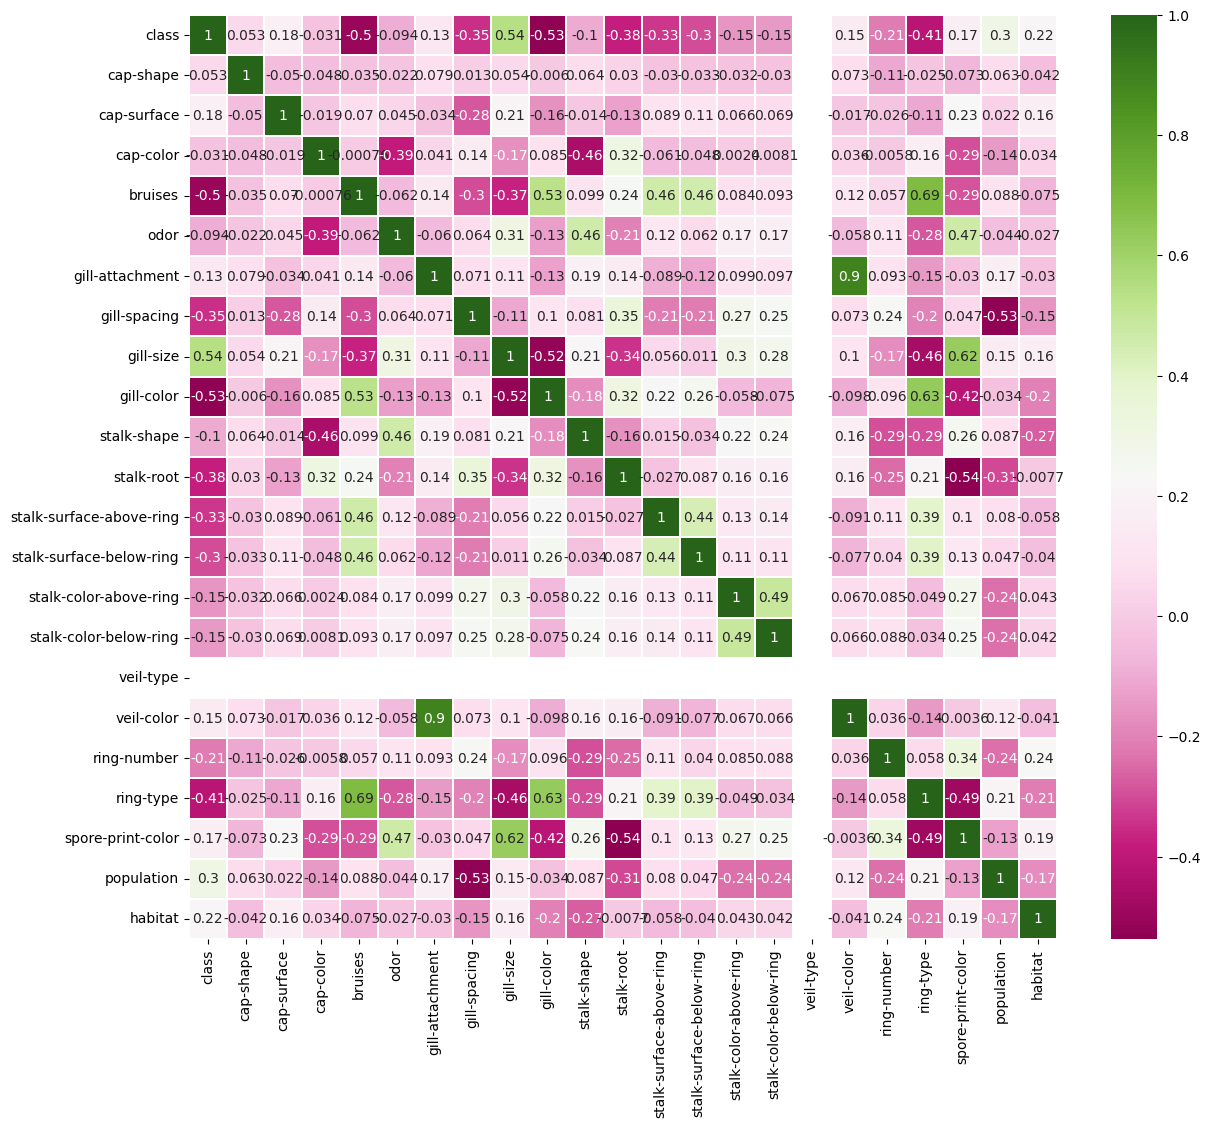

In [8]:
plt.figure(figsize = (14,12))
sns.heatmap(df.corr(), linewidths = .1, cmap = "PiYG", annot = True)
plt.yticks(rotation = 0);

In [9]:
df.drop(["veil-type"], axis = "columns", inplace = True)

We created a triangle correlation map to more easily display important data. To do this, we define the mask to set the values in the upper triangle to True

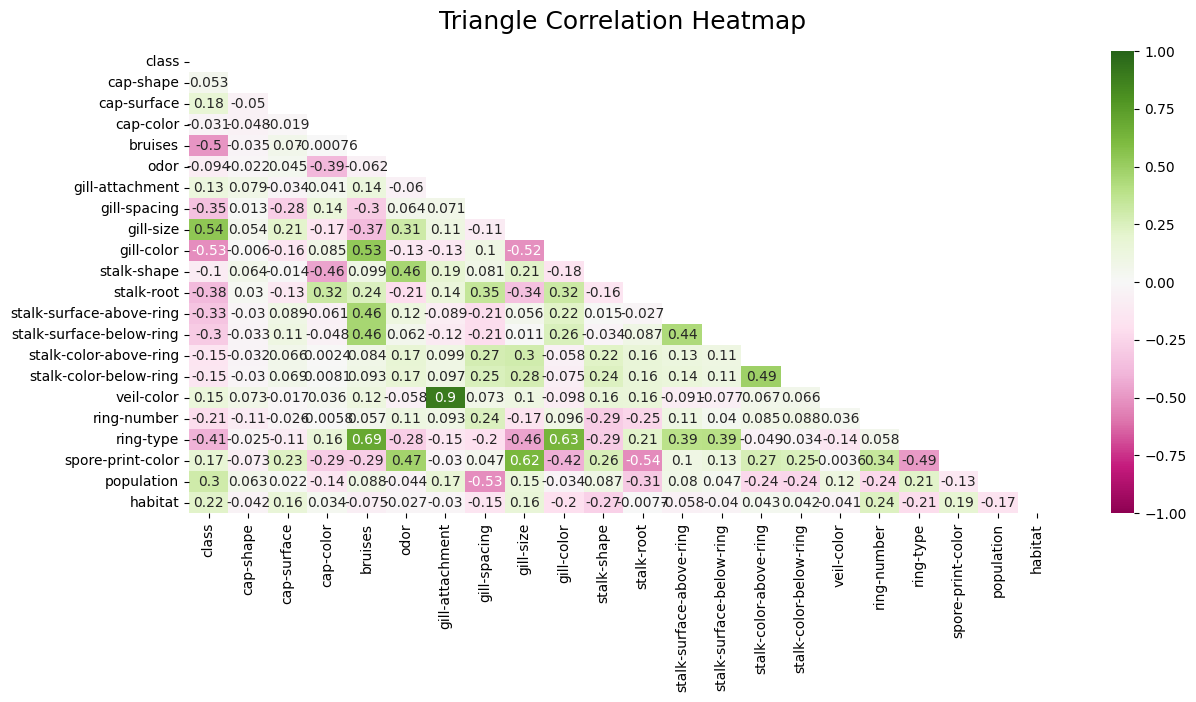

In [10]:
plt.figure(figsize = (14, 6))
mask = np.triu(np.ones_like(df.corr(), dtype = bool))
heatmap = sns.heatmap(df.corr(), mask = mask, vmin = -1, vmax = 1, annot = True, cmap = 'PiYG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict = {'fontsize':18}, pad = 16);

<Axes: title={'center': 'Correlation'}>

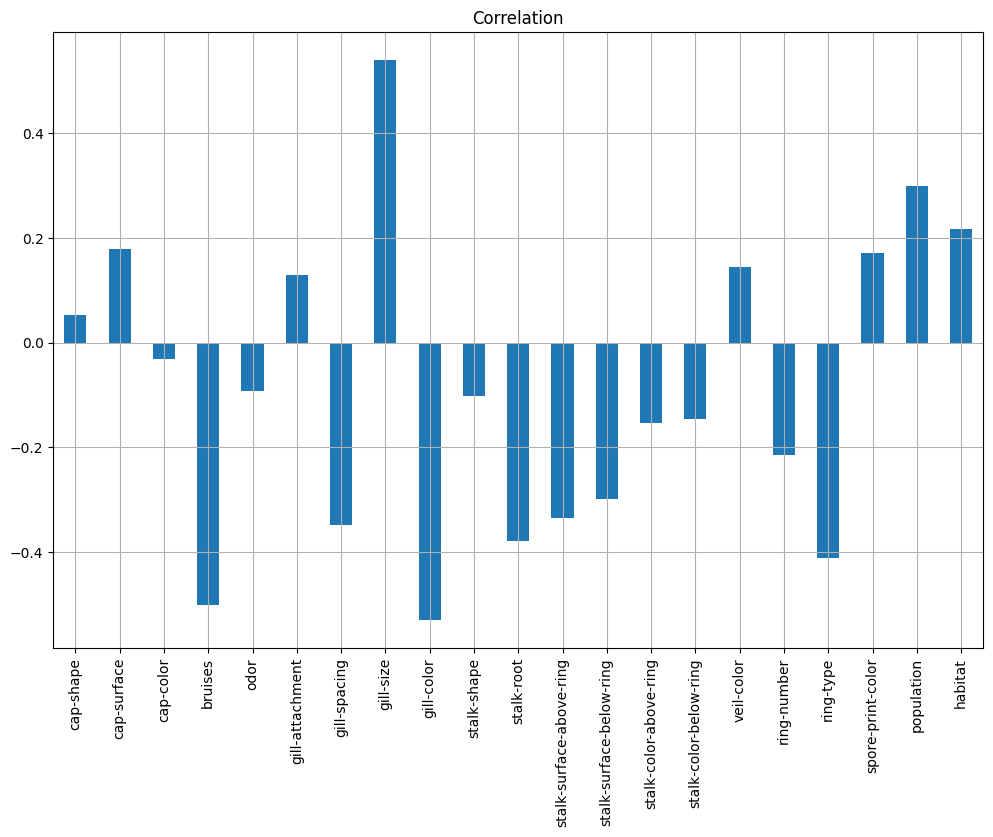

In [11]:
df.drop('class', axis = 1).corrwith(df["class"]).plot(kind = 'bar', grid = True, figsize = (12, 8),
                                                   title = "Correlation")

In [12]:
df = df[["class", "gill-color", "spore-print-color", "population", "gill-size", "odor", "bruises", "stalk-shape", "stalk-color-above-ring", "stalk-root"]]

Now we can split our data in train and test

In [13]:
X = df.drop(['class'], axis = 1)
y = df['class']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state = 42)

# Model Training - Decision Tree Classifier

 ## Score

In [14]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

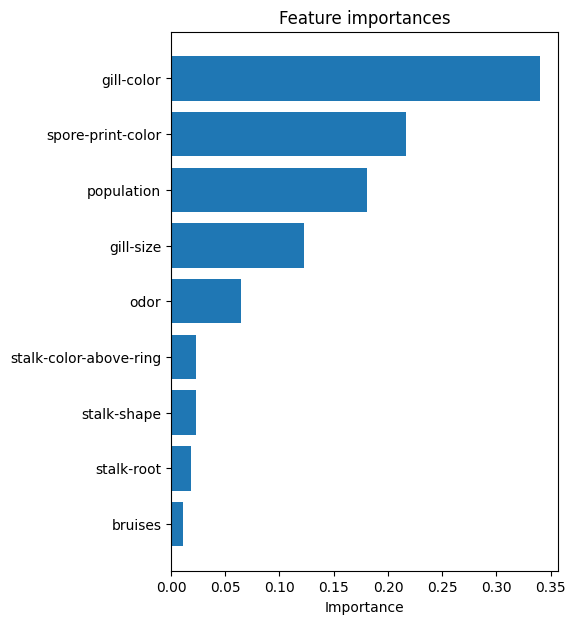

In [15]:
features_list = X.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize = (5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align = 'center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

# Model Testing - Decision Tree Classifier

## Classification report

In [16]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1167
           1       1.00      1.00      1.00      1108

    accuracy                           1.00      2275
   macro avg       1.00      1.00      1.00      2275
weighted avg       1.00      1.00      1.00      2275



# Model Training - Random Forest Classifier

## Score

In [17]:
RF = RandomForestClassifier(n_estimators = 10)
RF.fit(X_train,y_train)
RF.score(X_test,y_test)

1.0

# Model Testing - Random Forest Classifier

## Predict

In [18]:
y_pred = RF.predict(X_test)

## Accuracy score

In [19]:
accuracy_score(y_test,y_pred)

1.0

## Confusion matrix

In [20]:
confusion_matrix(y_test,y_pred)

array([[1167,    0],
       [   0, 1108]])

## Classification report

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1167
           1       1.00      1.00      1.00      1108

    accuracy                           1.00      2275
   macro avg       1.00      1.00      1.00      2275
weighted avg       1.00      1.00      1.00      2275



We can see our model made alright predictions and precision and recall for both classes are 1.0. So we identified the mushroom correctly!